# (Prosper Loan Dataset Exploration)
## by (Moshira Ezzat Mostafa)

## Table of Contents
<ul>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<ol><li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering and Assessment</a></li>
<li><a href="#cleaning">Data Cleaning</a></li></ol>
    <ol></ol>
<li><a href="#explore">Exploratory Analysis</a></li>
<ol><li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li></ol>
    <ol></ol>

<a id='wrangling'></a>
## Preliminary Wrangling

<a id='intro'></a>
## 1- Introduction

> This is a financial dataset from Prosper marketplace inc., it includes information about Loans, Borrowers, Lenders, interest rates ...

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

<a id='gathering'></a>
## 2- Data Gathering and Assessment

In [2]:
# load the dataset
raw_df= pd.read_csv('prosperLoanData.csv')

In [3]:
# overview of the data shape and composition
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
# descriptive statistics for numeric variables
raw_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
# explore the variables of interest
raw_df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [6]:
raw_df['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [7]:
raw_df['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [8]:
raw_df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

<a id='cleaning'></a>
## 3- Data Cleaning

In [9]:
# Take a copy from the dataframe
df= raw_df.copy()

### - Replace the numeric values of the listing category with the corresponding keywords

In [10]:
# convert the data type of listing category into string
df['ListingCategory (numeric)']= df['ListingCategory (numeric)'].astype(str)

# replace the listing category number with their values
df['ListingCategory (numeric)'].replace({"0": "NA", "1": "Debt Consolidation", "2": "Home Improvement", "3": "Business", "4": "Personal Loan", "5": "Student Use", "6": "Auto", "7": "Other", "8": "Baby&Adoption", "9": "Boat", "10": "Cosmetic Procedure", "11": "Engagement Ring", "12": "Green Loans", "13": "Household Expenses", "14": "Large Purchases", "15": "Medical/Dental", "16": "Motorcycle", "17": "RV", "18": "Taxes", "19": "Vacation", "20": "Wedding Loans"}, inplace=True)

# rename the listing category column
df= df.rename(columns={'ListingCategory (numeric)': 'ListingCategory'})
df['ListingCategory'].value_counts()

Debt Consolidation    58308
NA                    16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

### - Extract the loan origination year from the loan origination date

In [11]:
# convert Loan Origination Date dtype from string to date time
df['LoanOriginationDate']= pd.to_datetime(df['LoanOriginationDate'])
df.LoanOriginationDate.dtype

dtype('<M8[ns]')

In [12]:
# create new column for loan origination year
df['LoanOriginationYear']= df['LoanOriginationDate'].dt.year
df['LoanOriginationYear'].head()

0    2007
1    2014
2    2007
3    2012
4    2013
Name: LoanOriginationYear, dtype: int64

### - Add the unit of the loan term values to be more readable

In [13]:
# add 'months' word at the end of the term column values
df['Term'] = df['Term'].astype(str) + ' months'
df['Term'].value_counts()

36 months    87778
60 months    24545
12 months     1614
Name: Term, dtype: int64

### What is the structure of your dataset?

> This dataset contains 113,937 loans with 81 variables on each loan, storing information about the borrowers, Loans, and many others.

### What is/are the main feature(s) of interest in your dataset?

> This data analysis will focus on investigating the factors that influence the borrower rate 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>- Features about Loans like Loan Listing Category, Loan Orignal Amount, Monthly Loan Payment,Loan Term, Loan Estimated Return, and Loan Estimated Loss.

>- Features about borrowers like Employment Status, Occupation, Employment Status Duration, Income Range, Stated Monthly Income, Prosper Score, and Debt/Income Ratio.

<a id='explore'></a>
## Exploratory Analysis

<a id='univariate'></a>
## 1- Univariate Exploration
> At first, the investigation will explore the distribution of the features of interest

### I- Loans' features

> In this section the investigation will analyze variables that describe the loan

### - What is the purpose of the loan?

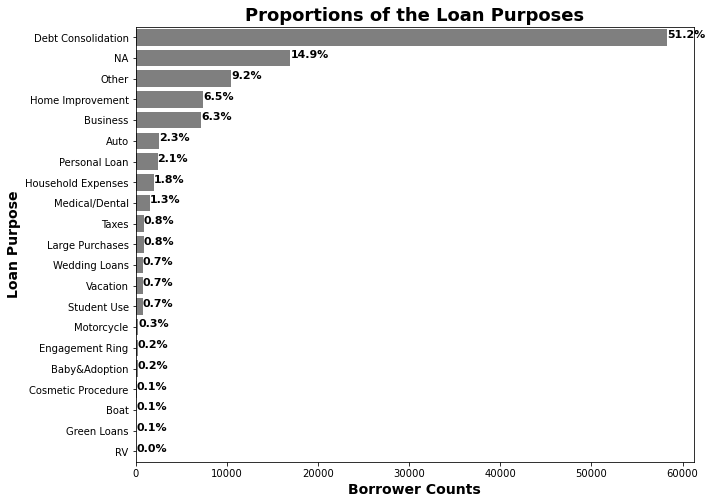

In [14]:
# plot a bar figure showing the listing category distribution
listing_counts= df.ListingCategory.value_counts()
n_listing= listing_counts.sum()
listing_order= listing_counts.index
color= sb.color_palette()[7]

plt.figure(figsize= [10,8])
sb.countplot(data= df, y='ListingCategory', order= listing_order, color= color)
plt.ylabel('Loan Purpose', fontsize= 14, weight= 'bold')
plt.xlabel('Borrower Counts', fontsize= 14, weight= 'bold')
plt.title('Proportions of the Loan Purposes', fontsize= 18, weight= 'bold')

for i in range(listing_counts.shape[0]):
    count= listing_counts[i]
    listing_pct= '{:0.1f}%'.format(100*count/n_listing)
    plt.text(count+1, i, listing_pct, fontsize= 11, weight= 'bold');

### observation
> It is clear that debt consolidation is the common purpose for a loan representing 51.2% of the total loans.

### - What is the loan status for the available loans?

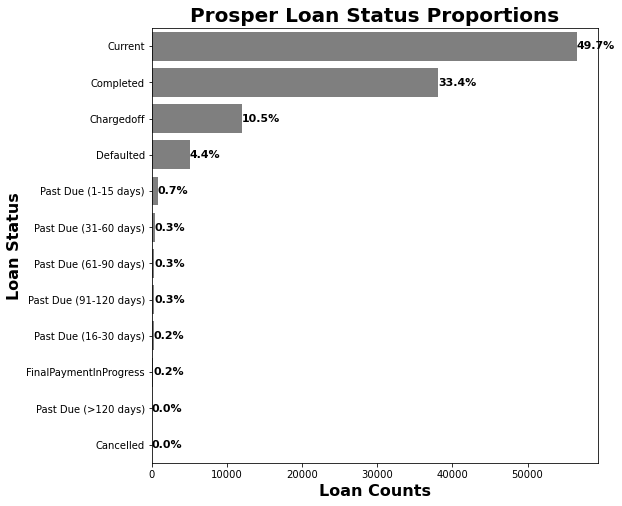

In [15]:
# plot a bar figure showing the proportions of the prosper loan status
LoanStatus_counts= df.LoanStatus.value_counts()
n_Loans= LoanStatus_counts.sum()
loanstatus_order= LoanStatus_counts.index

plt.figure(figsize=[8,8])
sb.countplot(data= df, y='LoanStatus', color= color, order= loanstatus_order)
plt.xlabel('Loan Counts', fontsize= 16, weight= 'bold')
plt.ylabel('Loan Status', fontsize= 16, weight= 'bold')
plt.title('Prosper Loan Status Proportions', fontsize= 20, weight= 'bold')

for i in range(LoanStatus_counts.shape[0]):
    count= LoanStatus_counts[i]
    Loan_pct= '{:0.1f}%'.format(100*count/n_Loans)
    plt.text(count+1, i, Loan_pct, va='center', fontsize= 11, weight= 'bold');

### Observation
> Half of the loans are in the current status, 33.4% of the loans are completed, 10.5% of the loans are chargedoff and only 4.4% are defaulted.

### - What is the most popular loan term for the borrowers?!

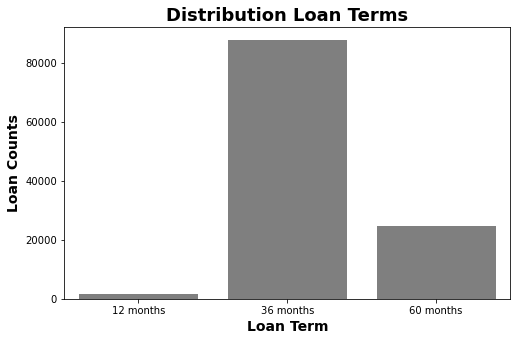

In [16]:
# plot a bar figure showing the count of loans for the available terms
term_order=['12 months', '36 months', '60 months']

plt.figure(figsize= [8,5])
sb.countplot(data= df, x='Term', order= term_order, color= color)
plt.xlabel('Loan Term', fontsize= 14, weight= 'bold')
plt.ylabel('Loan Counts', fontsize= 14, weight= 'bold')
plt.title('Distribution Loan Terms', fontsize= 18, weight= 'bold');

### Observation
> Loans of medium-term (36 months) attract the borrowers more than short-term (12 months) and long-term (60 months) loans

### - What is the distribution of the loan amounts?

In [17]:
# check the describtive statistics of the loan amounts
df.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

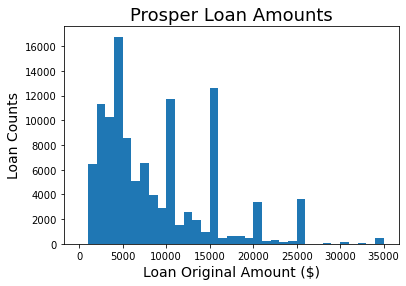

In [18]:
# plot the distribution of the loan original amount
bins= np.arange(0, df.LoanOriginalAmount.max()+1000, 1000)
plt.hist(data= df,x='LoanOriginalAmount', bins=bins)
plt.xlabel('Loan Original Amount ($)', fontsize= 14)
plt.ylabel('Loan Counts',fontsize= 14)
plt.title('Prosper Loan Amounts', fontsize= 18);

### Observation
> The loan original amount distribution is right skewed with multiple high peaks at 5000, 10000, and 15000

### - What is the distribution of the borrower rate?

In [19]:
# check the describtive statistics of the borrower rate
print(df.BorrowerRate.describe())
print('mode:        {}'.format(df.BorrowerRate.mode().values))
print('median:       {}'.format(df.BorrowerRate.median()))

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64
mode:        [0.3177]
median:       0.184


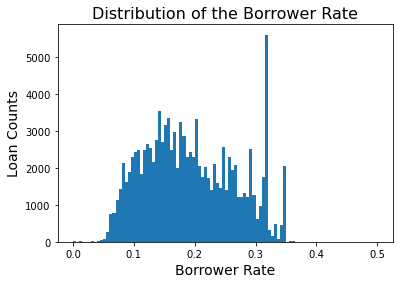

In [20]:
# plot the distribution of the borrower rate
bins= np.arange(0, df.BorrowerRate.max()+0.005, 0.005)
plt.hist(data= df, x='BorrowerRate', bins=bins)
plt.xlabel('Borrower Rate', fontsize= 14)
plt.ylabel('Loan Counts', fontsize= 14)
plt.title('Distribution of the Borrower Rate', fontsize= 16);

### Observation
> The borrower rate shows a multimodal distribution with the highest spike approximately at 0.32.

### - Distribution of Monthly Loan Payment 

In [21]:
# check the describtive statistics of themonthly loan payment
df.MonthlyLoanPayment.describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

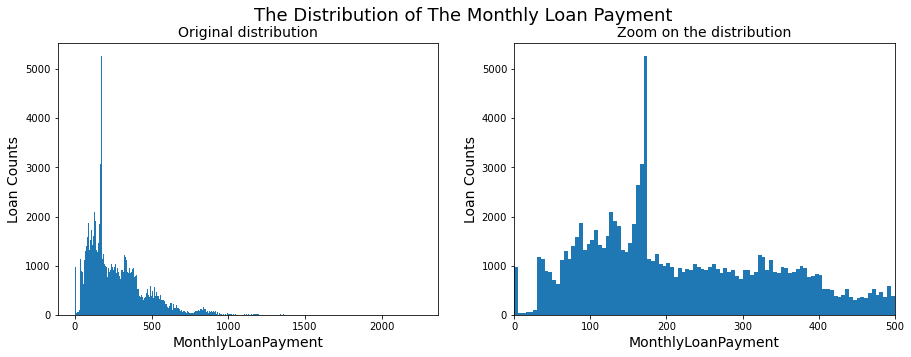

In [22]:
# plot the distribution of the monthly loan payment 
plt.figure(figsize= [15,5])
plt.subplot(1,2,1)
mlp_bins= np.arange(0, df.MonthlyLoanPayment.max()+ 5, 5)
plt.hist(data= df, x='MonthlyLoanPayment', bins= mlp_bins)
plt.xlabel('MonthlyLoanPayment', fontsize= 14)
plt.ylabel('Loan Counts', fontsize= 14)
plt.title('Original distribution', fontsize= 14)

# zoom in the distribution
plt.subplot(1,2,2)
plt.hist(data= df, x='MonthlyLoanPayment', bins= mlp_bins)
plt.xlabel('MonthlyLoanPayment', fontsize= 14)
plt.ylabel('Loan Counts', fontsize= 14)
plt.xlim(0,500)
plt.title('Zoom on the distribution', fontsize= 14)
plt.suptitle("The Distribution of The Monthly Loan Payment", fontsize= 18);

### Observation
> The monthly loan payment is right distributed with a spike approximately at 175-180

### - What is the distribution of the loan estimated return and loss? 

In [23]:
# check the describtive statistics of the estimated loan return
df.EstimatedReturn.describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

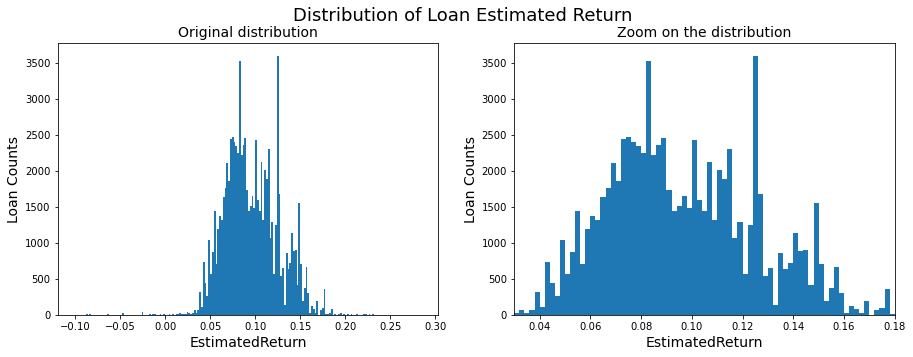

In [24]:
# plot the distribution of the estimated loan return
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
ebins= np.arange(-0.1, df.EstimatedReturn.max()+0.002, 0.002)
plt.hist(data= df,x='EstimatedReturn', bins=ebins)
plt.xlabel('EstimatedReturn', fontsize= 14)
plt.ylabel('Loan Counts',fontsize= 14)
plt.title('Original distribution', fontsize= 14)

#zoom in to the distribution
plt.subplot(1,2,2)
plt.hist(data= df,x='EstimatedReturn', bins=ebins)
plt.xlabel('EstimatedReturn', fontsize= 14)
plt.ylabel('Loan Counts',fontsize= 14)
plt.title('Zoom on the distribution', fontsize= 14)
plt.suptitle('Distribution of Loan Estimated Return', fontsize= 18)
plt.xlim(0.03, 0.18);

In [25]:
# check the describtive statistics of the estimated loan return
df.EstimatedLoss.describe()

count    84853.000000
mean         0.080306
std          0.046764
min          0.004900
25%          0.042400
50%          0.072400
75%          0.112000
max          0.366000
Name: EstimatedLoss, dtype: float64

Text(0.5, 1.0, 'Original distribution')

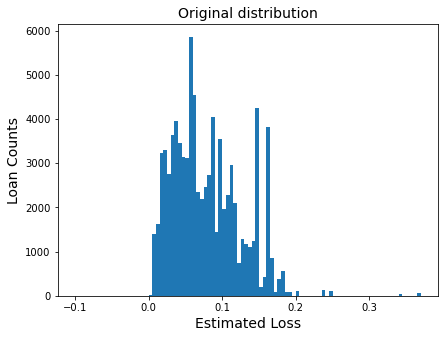

In [26]:
# plot the distribution of the estimated loan return
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
Lbins= np.arange(-0.1, df.EstimatedLoss.max()+0.005, 0.005)
plt.hist(data= df,x='EstimatedLoss', bins=Lbins)
plt.xlabel('Estimated Loss', fontsize= 14)
plt.ylabel('Loan Counts',fontsize= 14)
plt.title('Original distribution', fontsize= 14)

### Observation
> The estimated return has a bimodal distribution with spikes approximately at 0.084, and 0.124
> 
> The estimated loss distribution is right skewed with multiple spikes approximately at 0.05, 0.08, 0.145, 0.16

### II- Borrowers' features

> In this section, the investigation will dive deep into the borrowers' job history to explore their financial situation. 

### - What is the borrower's employment state?

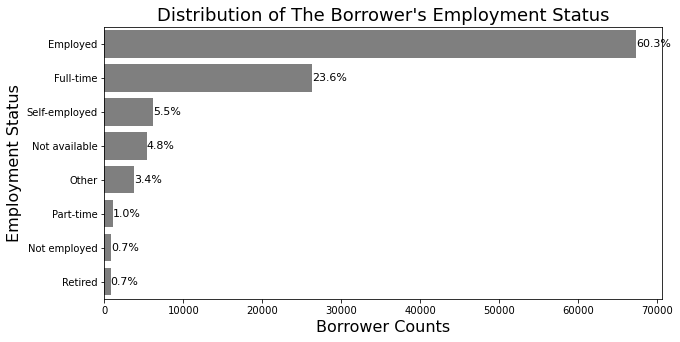

In [27]:
# plot the proportions of the employment status for the borrowers
emp_counts= df.EmploymentStatus.value_counts()
n_emp= emp_counts.sum()
emp_order= emp_counts.index

plt.figure(figsize= [10,5])
sb.countplot(data= df, y='EmploymentStatus', order= emp_order, color= color)
plt.ylabel('Employment Status', fontsize= 16)
plt.xlabel('Borrower Counts', fontsize= 16)
plt.title("Distribution of The Borrower's Employment Status", fontsize= 18)

for i in range(emp_counts.shape[0]):
    count= emp_counts[i]
    emp_pct= '{:0.1f}%'.format(100*count/n_emp)
    plt.text(count+1, i, emp_pct, va='center', fontsize= 11);

### Observation:
>  As expected The plot shows that the majority of the borrowers are employed, 60% preferred to fill this field as employed only without specifying full or part time, 23.6% are employed full-time, and 5.5% are self-employed, while part-time, not-employed, and retired people are rarely applying for a loan.

### - What is the borrower's occupation?

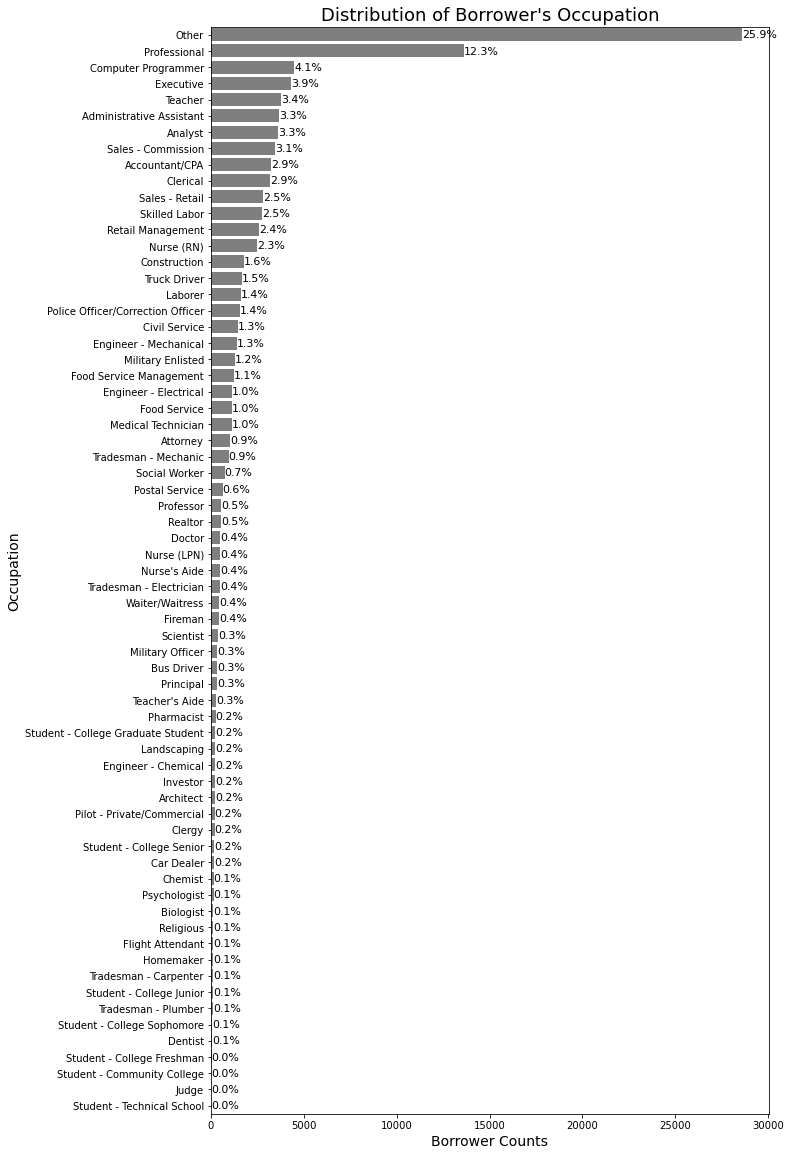

In [28]:
#plot the occupation proportions of the borrowers
occu_counts= df.Occupation.value_counts()
n_occu= occu_counts.sum()
occu_order= occu_counts.index

plt.figure(figsize= [10, 20])
sb.countplot(data= df, y='Occupation', order= occu_order, color= color)
plt.ylabel('Occupation', fontsize= 14)
plt.xlabel('Borrower Counts', fontsize= 14)
plt.title("Distribution of Borrower's Occupation", fontsize= 18)

for i in range(occu_counts.shape[0]):
    count= occu_counts[i]
    occu_pct= '{:0.1f}%'.format(100*count/n_occu)
    plt.text(count+1, i, occu_pct, va='center', fontsize= 11);

### Observation
> The plot shows that 25% of the borrowers did not found their occupation in the prosper occupation list and filled the occupation field as "other", 12.3% are professionals, while students and judge did not apply for loans.

### - How is the distribution of the borrower's income?

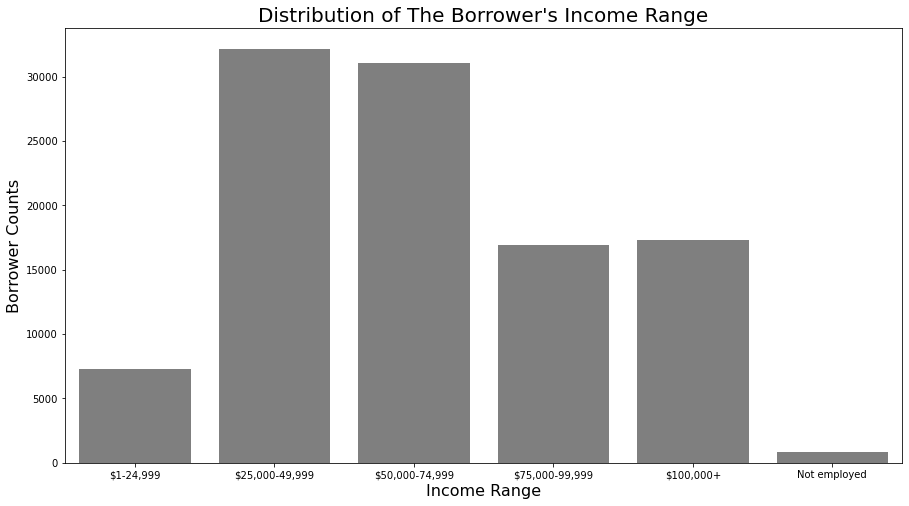

In [29]:
# plot the distribution of the borrower's income range
income_counts= df.IncomeRange.value_counts()
n_income= income_counts.sum()
income_order= ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not employed']

plt.figure(figsize=[15,8])
sb.countplot(data= df, x='IncomeRange', order= income_order, color=color)
plt.xlabel('Income Range', fontsize= 16)
plt.ylabel('Borrower Counts', fontsize= 16)
plt.title("Distribution of The Borrower's Income Range", fontsize= 20);

### Observation
> The income distribution shows that the borrowers majority have a medium-income ranging between 25.000-74.999, followed by the borrowers whose income exceeds 75.000, while the least borrowers are those who have income less than 25.000

In [30]:
# check the describtive statistics of stated monthly income
df.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [31]:
# check the log10 describtive statistics of stated monthly income
np.log10(df.StatedMonthlyIncome.describe())

count    5.056665
mean     3.748810
std      3.873814
min          -inf
25%      3.505195
50%      3.669007
75%      3.834103
max      6.243039
Name: StatedMonthlyIncome, dtype: float64

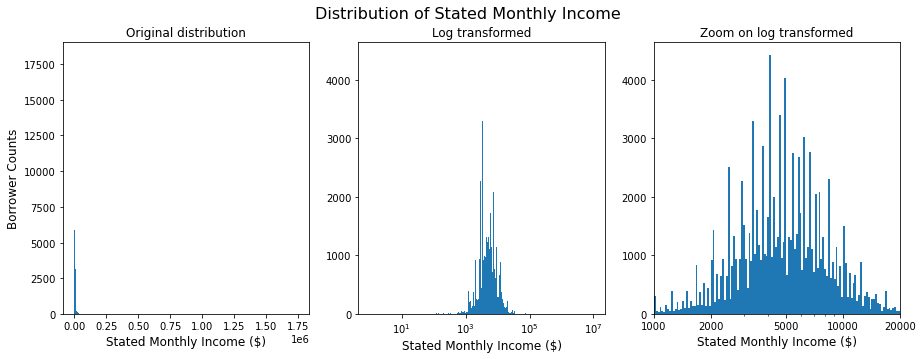

In [32]:
# plot the distribution for the stated monthly income of the borrowers
plt.figure(figsize= [15,5])
plt.subplot(1,3,1)
smi_bin= np.arange(df.StatedMonthlyIncome.min(), df.StatedMonthlyIncome.max()+ 1000,1000)
plt.hist(data=df, x='StatedMonthlyIncome', bins= smi_bin)
plt.xlabel('Stated Monthly Income ($)', fontsize= 12)
plt.ylabel('Borrower Counts', fontsize= 12)
plt.title('Original distribution',fontsize= 12)

plt.subplot(1,3,2)
smi_log_bin= 10**np.arange(0,7+0.01, 0.01)
plt.hist(data=df, x='StatedMonthlyIncome', bins= smi_log_bin)
plt.xlabel('Stated Monthly Income ($)', fontsize= 12)
plt.xscale('log')
plt.title('Log transformed',fontsize= 12)


plt.subplot(1,3,3)
ticks= [1000, 2000, 5000, 10000, 20000]
labels= ['{}'.format(v) for v in ticks]
plt.hist(data=df, x='StatedMonthlyIncome', bins= smi_log_bin)
plt.xlabel('Stated Monthly Income ($)', fontsize= 12)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlim(1000, 20000)
plt.title('Zoom on log transformed',fontsize= 12)
plt.suptitle('Distribution of Stated Monthly Income', fontsize= 16);

### Observation
> The majority have monthly income ranging between 1000 - 20000
> 
> The distribution shows some outliers since the maximum is approximately 1750003

### - How is the borrower's employment stability?
> This can be investigated through the analysis of two main variables:
> 1- the Employment status duration, and  2- Debt to Income Ratio (DIR)

In [33]:
# check the describtive statistics of employment status duration
df.EmploymentStatusDuration.describe()

count    106312.000000
mean         96.071582
std          94.480605
min           0.000000
25%          26.000000
50%          67.000000
75%         137.000000
max         755.000000
Name: EmploymentStatusDuration, dtype: float64

In [34]:
# check the log10 describtive statistics of employment status duration
np.log10(df.EmploymentStatusDuration.describe())

count    5.026582
mean     1.982595
std      1.975343
min          -inf
25%      1.414973
50%      1.826075
75%      2.136721
max      2.877947
Name: EmploymentStatusDuration, dtype: float64

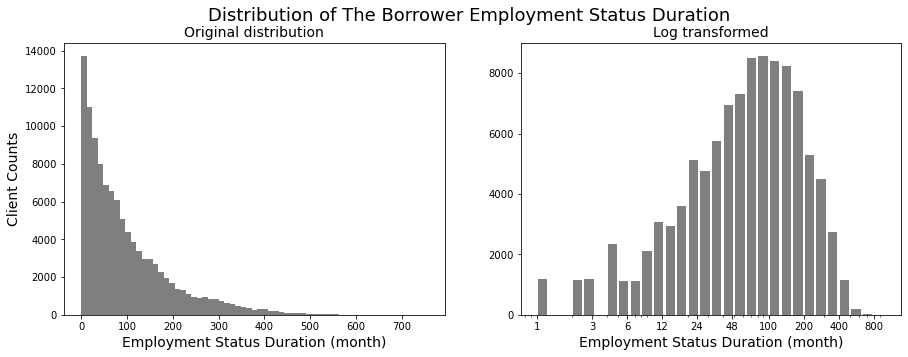

In [35]:
# plot the disribution of the employment status duration
plt.figure(figsize= [15,5])
plt.subplot(1,2,1)
esd_bins= np.arange(0, df.EmploymentStatusDuration.max()+ 12, 12)
plt.hist(data= df, x='EmploymentStatusDuration', bins= esd_bins, color= color)
plt.xlabel('Employment Status Duration (month)', fontsize= 14)
plt.ylabel('Client Counts', fontsize= 14)
plt.title('Original distribution', fontsize= 14)

plt.subplot(1,2,2)
esd_log_bins= 10**np.arange(0, 3+ 0.1, 0.1)
ticks= [1, 3, 6, 12, 24, 48, 100, 200, 400, 800]
labels=['{}'.format(v) for v in ticks]
plt.hist(data= df, x='EmploymentStatusDuration', bins= esd_log_bins, color= color, rwidth=0.8)
plt.xlabel('Employment Status Duration (month)', fontsize= 14)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Log transformed', fontsize= 14)
plt.suptitle('Distribution of The Borrower Employment Status Duration', fontsize= 18);

### Observation
> The employment status distribution is highly right skewed, and logarithmic transform is applied.
>
> The majority of the borrowers are employed for more than a year (12 months)

In [36]:
# check the describtive statistics of Debt to income ratio
df.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

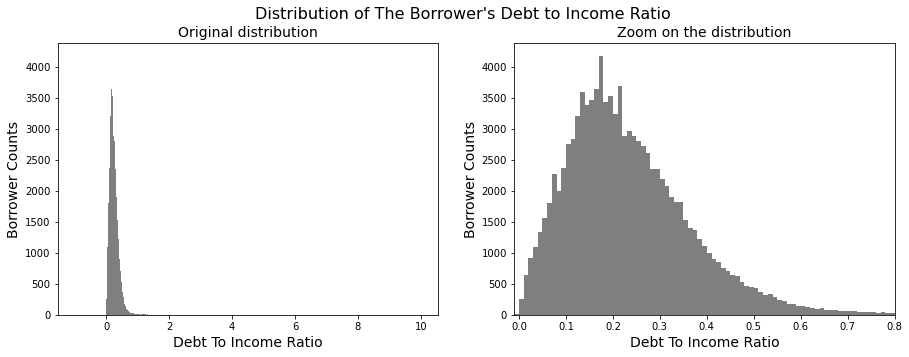

In [37]:
# plot the disribution of the debt to income ratio
plt.figure(figsize= [15,5])
dti_bins= np.arange(-1, 10+ 0.01, 0.01)
plt.subplot(1,2,1)
plt.hist(data= df, x= 'DebtToIncomeRatio', bins= dti_bins, color=color)
plt.xlabel('Debt To Income Ratio', fontsize= 14)
plt.ylabel('Borrower Counts', fontsize= 14)
plt.title('Original distribution', fontsize= 14)

plt.subplot(1,2,2)
plt.hist(data= df, x='DebtToIncomeRatio', bins= dti_bins, color= color)
plt.xlabel('Debt To Income Ratio', fontsize= 14)
plt.ylabel('Borrower Counts', fontsize= 14)
plt.xlim(-0.01, 0.8)
plt.title('Zoom on the distribution', fontsize= 14)
plt.suptitle("Distribution of The Borrower's Debt to Income Ratio", fontsize= 16);

### Observation
> The debt to income ratio distribution is right skewed 
>
>The majority of the borrowers have debt to income ratio less than 50%

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The borrower rate shows a multimodal distribution with the highest spike approximately at 0.32 which represent the mode, the maximum rate is 0.497, and the rate median is 0.184. The distribution is represented on it's natural linear scale using small bin size based on  the min. and the max. of the borrower rate

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> It is worth noting that stated monthly income and the employment status duration distributions are highly right skewed on the linear scale. However, after applying a logarithmic transform to the data, the distribution looks normal or near to normal.
>
> The distributions of the DIR, monthly loan payment, loan amount, and loan estimated return show some outliers that may be misleading, so axis limit is applied to focus on the bulk of the data
>
> The numeric values of the listing category were replaced with their keywords in order to be readable on the plots.

<a id='bivariate'></a>
## 2- Bivariate Exploration

> In this section, the investigation will analyze the relationships between pairs of the features explored in the previous section (univariate exploration).

### - Correlations Overview

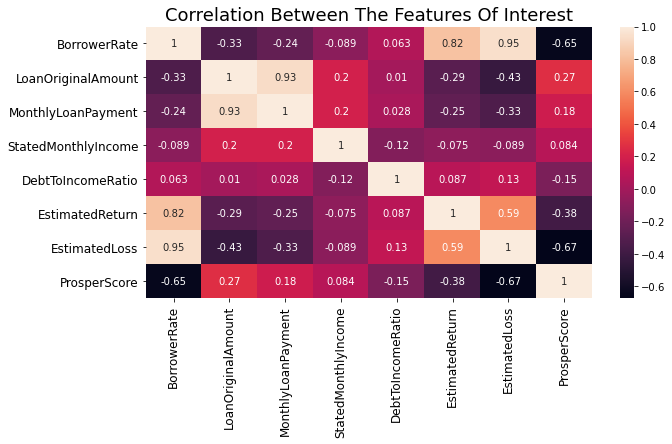

In [38]:
# plot a heat map explore the correlations between the features of interest
col= ['BorrowerRate','LoanOriginalAmount','MonthlyLoanPayment','StatedMonthlyIncome', 'DebtToIncomeRatio', 'EstimatedReturn', 'EstimatedLoss', 'ProsperScore']
plt.figure(figsize = [10, 5])
sb.heatmap(df[col].corr(), annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation Between The Features Of Interest', fontsize= 18);

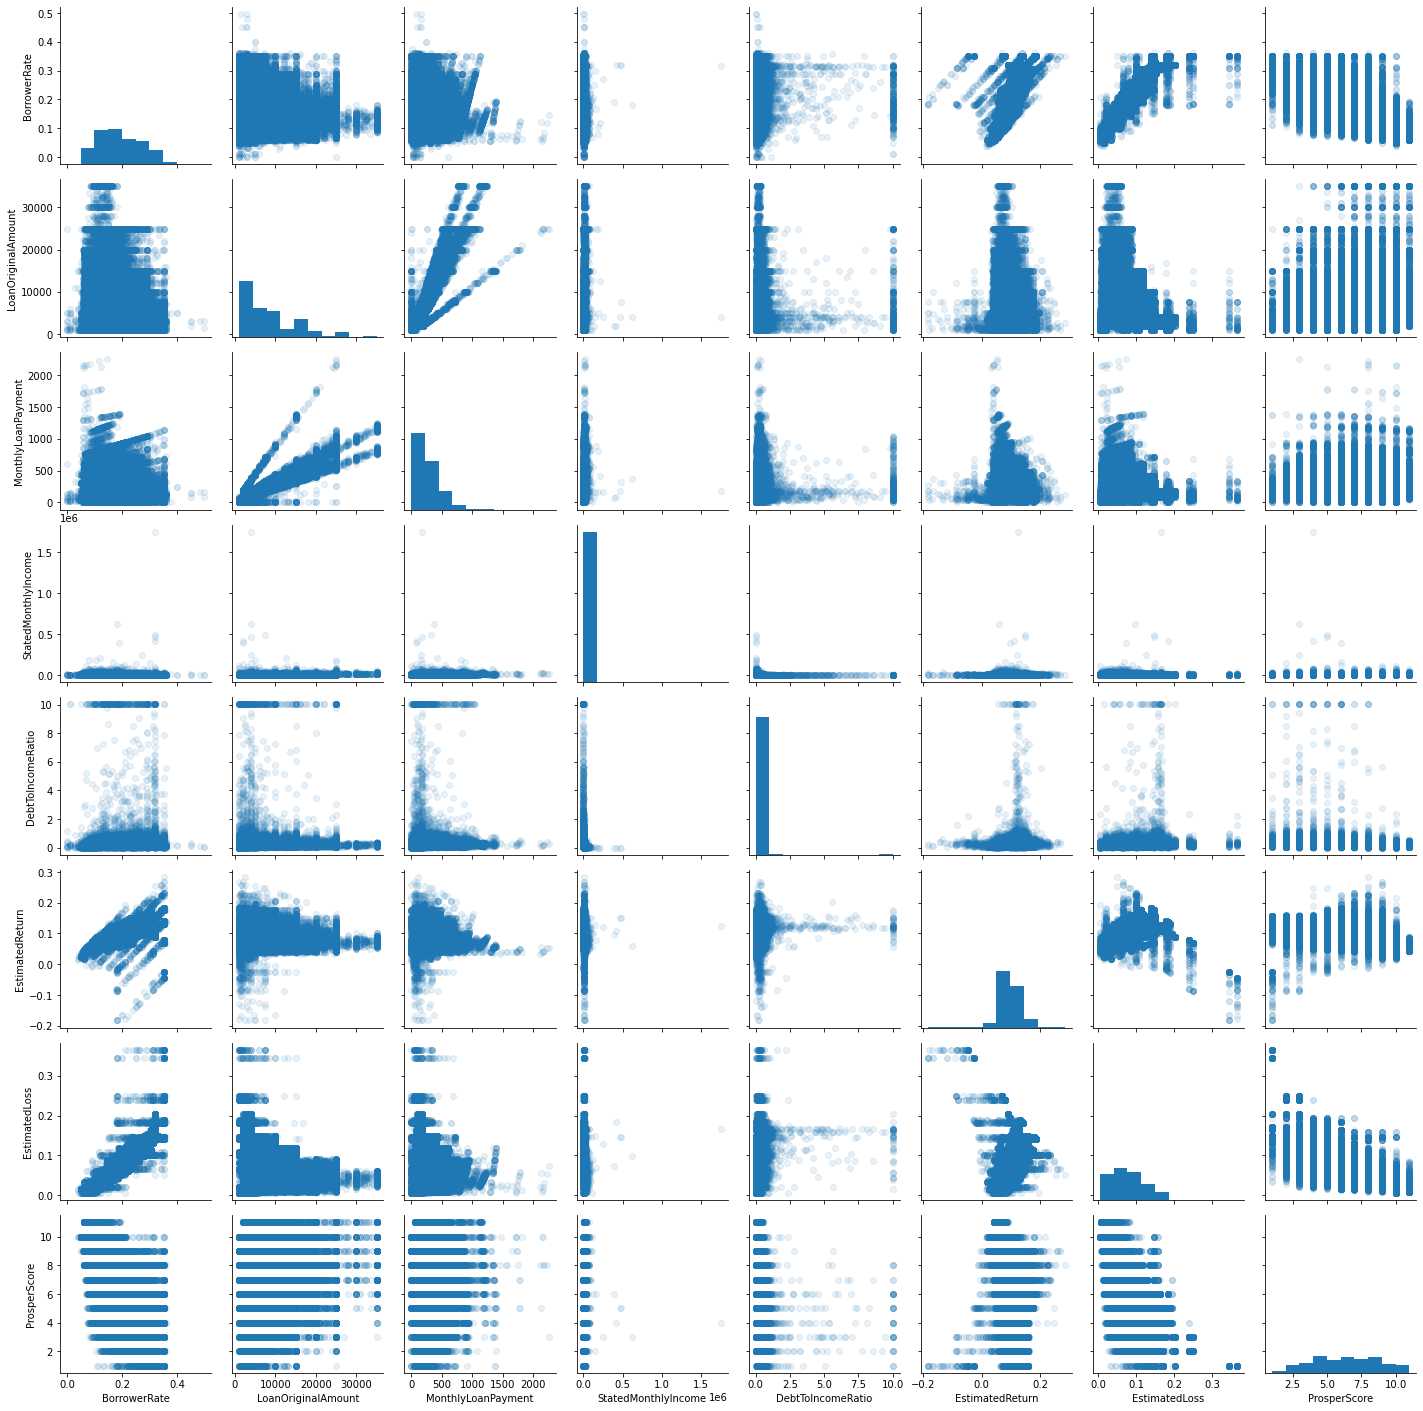

In [39]:
# plot a scatter matrics showing the correlations between the features of interest
g= sb.PairGrid(data= df, vars= ['BorrowerRate','LoanOriginalAmount','MonthlyLoanPayment','StatedMonthlyIncome', 'DebtToIncomeRatio', 'EstimatedReturn', 'EstimatedLoss', 'ProsperScore'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha=0.1);

### Observation
> The correlation coefficient and the scatter plots show that the borrower rate has
> - Strong positive association with loan estimated return (r= 0.82), and estimated loss (r= 0.95)
> - Strong negative association with prosper score (r= -0.65)
> - Weak Negative association with the loan amount (r= -0.33), and the monthly loan payment (r= -0.24)
> - No association with stated monthly income (r=-0.089), and DIR (r= 0.063)
>
> Other correlations between the features
> - The prosper score shows strong negative correlation with the estimated loss (r= -0.67), and weak negative correlation with the estimated return (r= -0.38)
> - The loan amount shows strong positive correlation with the monthly loan payment (r= 0.93)
> - The stated monthly income shows weak positive correlation with the loan amount and the the monthly loan payment (r=0.2)
> - The estimated return shows strong positive correlation with estimated loss (r= 0.59)
> - The estimated loss shows moderate negative correlation with loan amount ( r= -0.43)

### - What is the impact of the loan term on the interest rate?

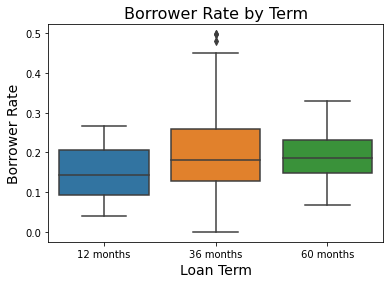

In [40]:
# plot box plot between the borrower rate and the term
sb.boxplot(data= df, x= 'Term', y='BorrowerRate',order= term_order)
plt.xlabel('Loan Term', fontsize= 14)
plt.ylabel('Borrower Rate', fontsize= 14)
plt.title('Borrower Rate by Term', fontsize= 16);

### Observation
> Long-term loans have higher interest rate than that of short-term loans

### - How can the borrower's income affect the interest rate?

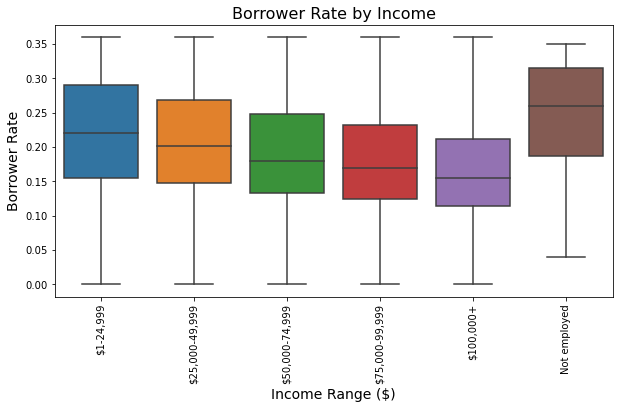

In [41]:
# plot boxplot between the borrower rate and the income range
plt.figure(figsize=[10,5])
sb.boxplot(data= df, x= 'IncomeRange', y='BorrowerRate', order= income_order)
plt.xlabel('Income Range ($)', fontsize= 14)
plt.ylabel('Borrower Rate', fontsize= 14)
plt.xticks(rotation= 90)
plt.title('Borrower Rate by Income', fontsize= 16);

### Observation
> - As the Income range increase the interest rate decrease.
> - Not-employed borrowers recieve the highest interest rate

### - What is the impact of home owning on the interest rate?

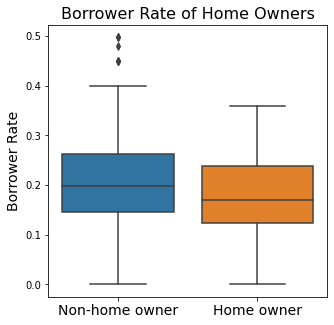

In [42]:
#plot boxplot between the borrower rate and borrower home owner
plt.figure(figsize= [5,5])
sb.boxplot(data=df, x='IsBorrowerHomeowner', y='BorrowerRate')
plt.xlabel(None)
plt.ylabel('Borrower Rate', fontsize=14)
xticks= np.arange(2)
xticks_labels= ('Non-home owner', 'Home owner')
plt.xticks(xticks, xticks_labels, fontsize=14)
plt.title('Borrower Rate of Home Owners', fontsize=16);

### Observation
> Home owners recieve lower interest rate than non-home owners

### - How did the interest rate change over years?

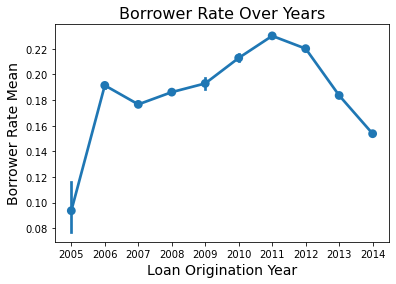

In [43]:
# plot a line for the borrower rate over time 
sb.pointplot(data= df, x='LoanOriginationYear', y='BorrowerRate')
plt.xlabel('Loan Origination Year', fontsize= 14)
plt.ylabel('Borrower Rate Mean', fontsize= 14)
plt.title('Borrower Rate Over Years', fontsize= 16);

### Observation
> The borrower rate dramatically grew up in 2005 and 2006, but slightly dropped in 2007. Then, it gradually increased through the years until it reached its highest in 2011. After that, it gradually dropped again through 2012 till 2014

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> A lower interest rate can be recieved by the borrowers who have the following features:
> - High Income range
> - Home Owner
> - High Loan amount
> - Short-Term Loans
> - High Prosper Score
> 
> As expected the high-interest rate increases the loan estimated return. but it worth noting that it also increases the loan estimated loss. This may be due to the probability of the borrower to struggle through pay-back the high-interest rate

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> Other correlations between the features
> - As the prosper score increase, the estimated loan loss decrease.
> - As the loan amount increase, the monthly loan payment increase.
> - As the estimated return increase, the estimated loss increase.
> - As the loan Amount increase, the estimated loss decrease.


<a id='multivariate'></a>
## 3- Multivariate Exploration

> In this section,the investigation will dive deep for further investigation of the interaction between the variables through creating plots of three or more variables .

### - Correlation between borrower rate and the estimated return by prosper score

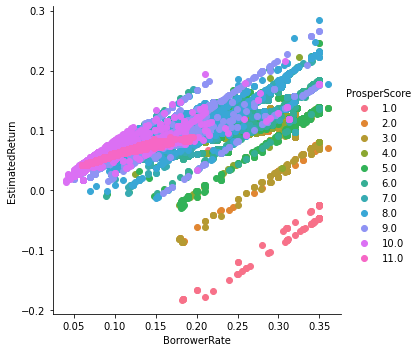

In [44]:
# plot a scatterplot  describing the relationship between borrower rate and estimated return and the prosper score
g = sb.FacetGrid(data = df, hue = 'ProsperScore', height= 5)
g.map(plt.scatter, 'BorrowerRate', 'EstimatedReturn')
g.add_legend();

### Observation
> This plot proves the previous findings that showed a positive association between the borrower rate and the estimated return, but a negative correlation between the prosper score and both the borrower rate and the estimated return.

### - Correlation between borrower rate and the estimated loss by prosper score

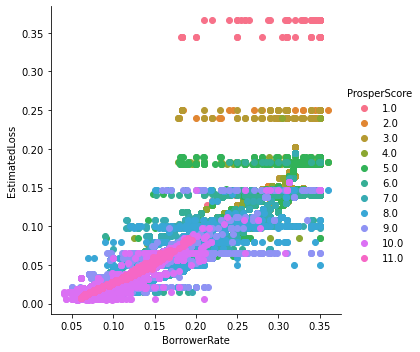

In [45]:
# plot a scatterplot  describing the relationship between borrower rate and estimated loss and the prosper score
g = sb.FacetGrid(data = df, hue = 'ProsperScore', height= 5)
g.map(plt.scatter, 'BorrowerRate', 'EstimatedLoss')
g.add_legend();

### Observation
> Interestinly, There is a storng positive association between borrower rate and the estimated loss, at the same time, the plot also showing that low-rate loans with low estimated loss have high prosper score, This findings confirm and follow the findings from the previous section.

### - Association between borrower rate and the prosper score by term

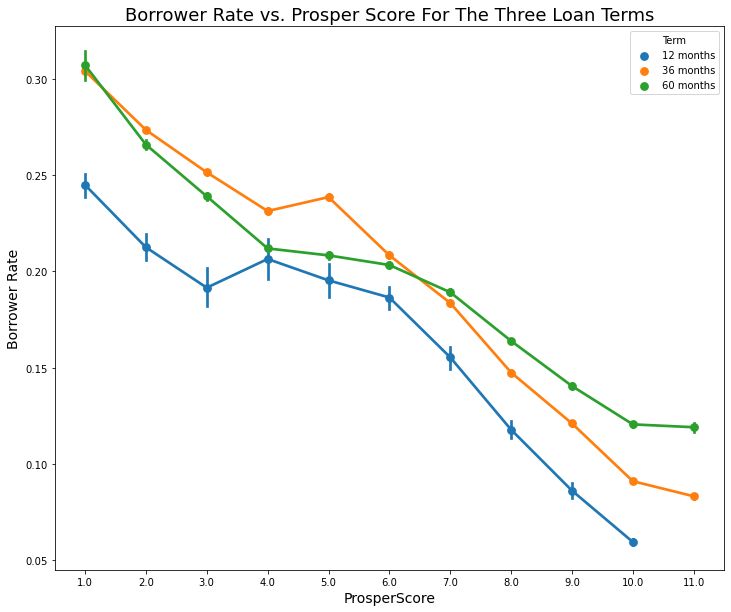

In [46]:
#plot a line plot  describing the relationship between borrower rate and prosper score by terms
plt.figure(figsize=(12, 10))
sb.pointplot(data=df, y='BorrowerRate', x='ProsperScore', hue= 'Term', hue_order= term_order)
plt.ylabel('Borrower Rate', fontsize= 14)
plt.xlabel('ProsperScore', fontsize= 14)
plt.title('Borrower Rate vs. Prosper Score For The Three Loan Terms', fontsize= 18);

### Observation
> As showed in the previous section, this plot proves that 
> - The higher the borrower rate the lower the prosper score
> - Short-term loans have lower borrower rate than that of the long-term loans

### - Correlation between borrower rate, estimated return, and loss 

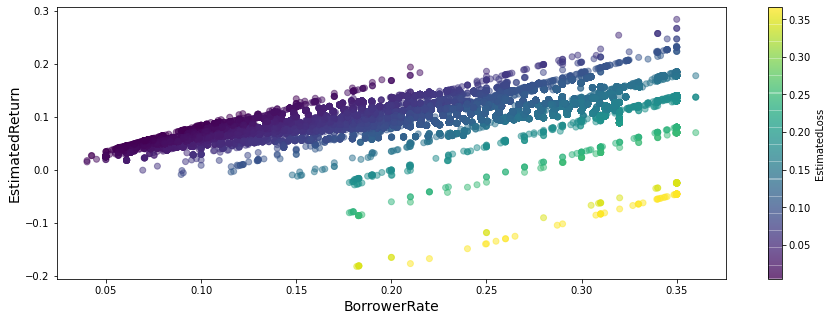

In [47]:
# plot a scatter plot showing the relationship between the borrower rate, estimated return and the estimated loss
plt.figure(figsize=[15,5])
plt.scatter(data = df, x = 'BorrowerRate', y = 'EstimatedReturn', c = 'EstimatedLoss', alpha= 0.5)
plt.colorbar(label= 'EstimatedLoss')
plt.xlabel('BorrowerRate', fontsize= 14)
plt.ylabel('EstimatedReturn', fontsize= 14);

### Observation
> Strong positive association between the borrower rate, and estimated return
> 
> Also, it is clear that loans with high interest rate and high estimated return have low estimated loss

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>This section of the investigation analyze the interrelationship between the borrower rate, estimated return & loss, and prosper score, the results show that the borrower rate can affect the loan estimated return and the custome risk score, in sense of that loans with high interest rate has high estimated return but low prosper score which means high risk.

### Were there any interesting or surprising interactions between features?

> Unexpectedly, the analysis revealed a strong positive correlation between the borrower rate and the loan estimated loss, which means that loans with high borrower rate show high estimated loss and high risk. This may be due to the borrower struggling in the repayment. If so, this could shine light on securing such loans to reduce this risk.